In [1]:
# importing necessary modules 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

Using TensorFlow backend.


In [2]:
#Data generator
img_width, img_height = 150, 150  # dimensons of our images

train_data_dir = 'C:/Users/shohidul/Desktop/wepon/train'
validation_data_dir = 'C:/Users/shohidul/Desktop/wepon/val'
train_samples = 300 #1000
validation_samples= 80
epochs = 20 #50
batch_size = 20

# Check the data wheter the format is right
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3) #150,150,3

In [3]:
input_shape

(150, 150, 3)

In [5]:
# Data preprocessing (Augmentation)
# Generate training set
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# generate testing set
# We use only rescaling augmentation configuration for test set 
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# create image for training using ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size= batch_size,
        class_mode='categorical')

Found 7972 images belonging to 3 classes.


In [8]:
print(train_generator.class_indices)

{'handguns': 0, 'others': 1, 'rifles': 2}


In [9]:
# if i want to see all the images
imgs, lablels = next(train_generator)

In [10]:
from skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

20
[1. 0. 0.]


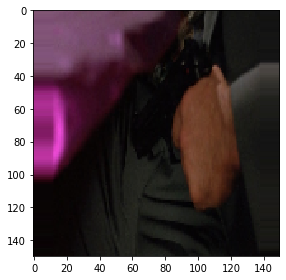

[0. 0. 1.]


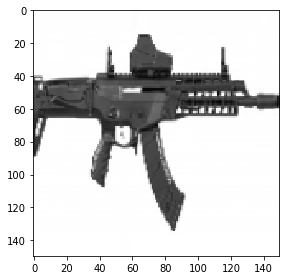

[1. 0. 0.]


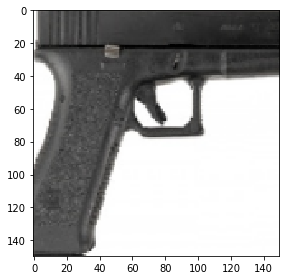

[0. 0. 1.]


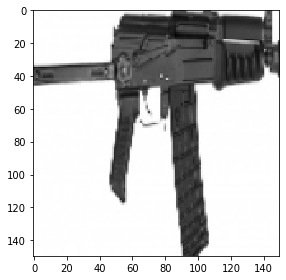

[1. 0. 0.]


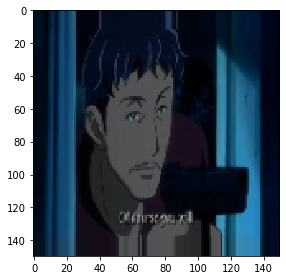

[0. 0. 1.]


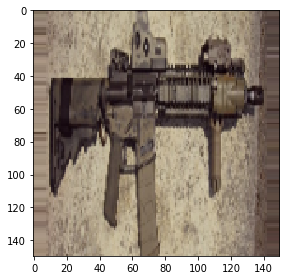

[0. 1. 0.]


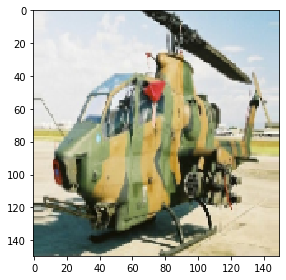

[0. 0. 1.]


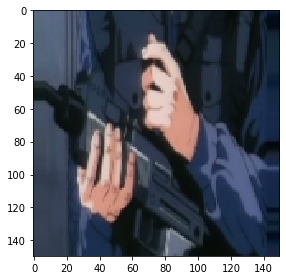

[1. 0. 0.]


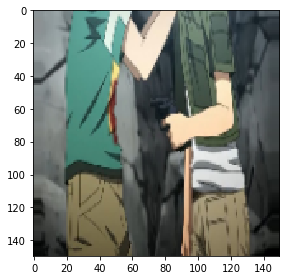

[0. 0. 1.]


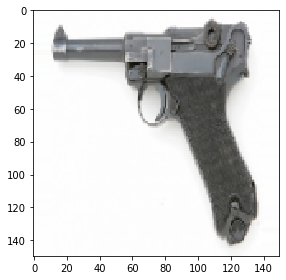

[0. 0. 1.]


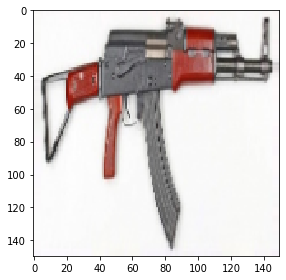

[0. 0. 1.]


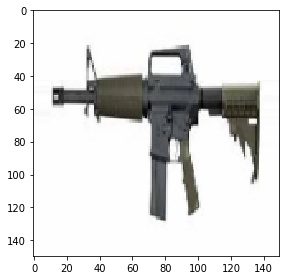

[0. 0. 1.]


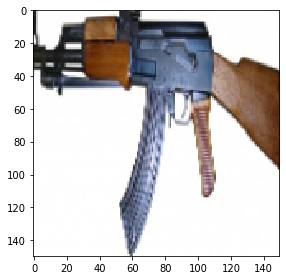

[0. 0. 1.]


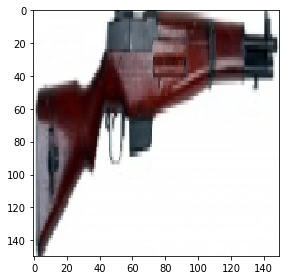

[0. 0. 1.]


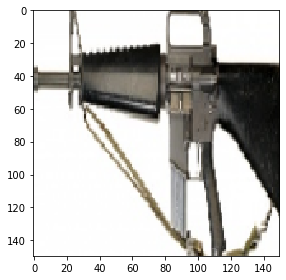

[0. 1. 0.]


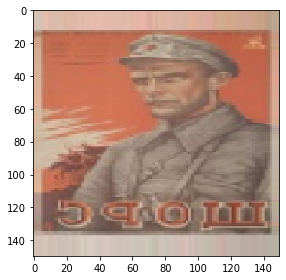

[1. 0. 0.]


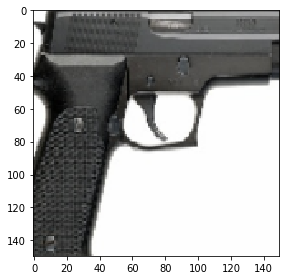

[0. 0. 1.]


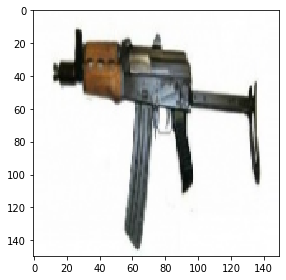

[1. 0. 0.]


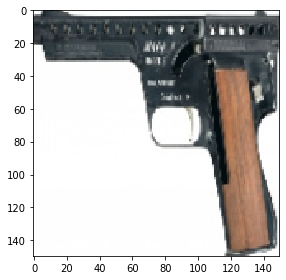

[0. 0. 1.]


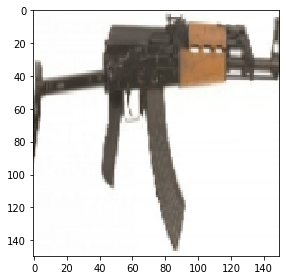

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch, label_batch = train_generator.next()

print(len(image_batch))
for i in range(0, len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [12]:
# # create image for validation using ImageDataGenerator
validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size= (img_width, img_height),
        batch_size= batch_size,# it will take 20 image at a time and convert (optimization of computation)
        class_mode= 'categorical')

Found 1709 images belonging to 3 classes.


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# We have generated data and preprocessed as well. now we will put the data into the neural network
# Making neural network

model=Sequential()
# Conv2D : two dimensional convulational model
# 32: input for next layer
#(3,3): convulational window size
model.add(Conv2D(32,(3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.add(Activation('sigmoid'))

#model.smmary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [14]:
# compiling all the layers above
model.compile(loss="categorical_crossentropy", 
             optimizer="adam",
             metrics=['accuracy'])

In [ ]:
#this is the augmentation configuration we will use for training data set
# now put the training data generator into the particular neuron network

history = model.fit_generator(
            train_generator,
            steps_per_epoch=train_samples,
            epochs= epochs,
            validation_data = validation_generator,
            validation_steps = validation_samples)

model.save_weights('first_try.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
300/300 [==============================] - 797s 3s/step - loss: 1.0445 - accuracy: 0.5187 - val_loss: 1.1279 - val_accuracy: 0.5138
Epoch 2/20
 29/300 [=>............................] - ETA: 23:10 - loss: 1.0519 - accuracy: 0.5000

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


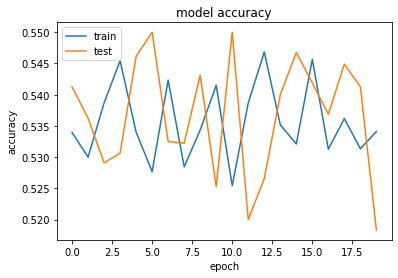

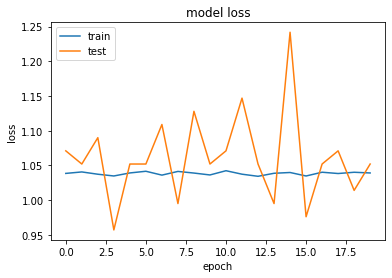

In [14]:
# list all the data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [15]:
# now predict
predict_data_dir = 'C:/Users/Rabbil/Documents/New_folder_weapons_dataset/test'
